# Benchmark analysis


`````{margin}
````{dropdown} Necessary imports
```{code-block} python
from colosseum.analysis.plots import plot_indicator_in_hardness_space, agent_performances_per_mdp_plot
from colosseum.analysis.tables import get_latex_table_of_average_indicator, get_latex_table_of_indicators
```
````
`````

In [1]:
import os
import shutil
from myst_nb import glue

from colosseum.analysis.plots import plot_indicator_in_hardness_space, agent_performances_per_mdp_plot
from colosseum.analysis.tables import get_latex_table_of_average_indicator, get_latex_table_of_indicators

benchmark_log_folder = "./experiments" + os.sep + "tabular" + os.sep + "benchmarking" + os.sep + "paper_results" + os.sep + "benchmark_continuous_communicating"

2022-10-15 16:38:42.693157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 16:38:42.783749: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-10-15 16:38:43.218738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-15 16:38:43.218780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-15 16:38:43.218784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


This tutorial explains how to analyse the results of {{col}} benchmarking procedures.
The running example is the result for tabular agents in the continuous communicating setting presented in the accompanying {{paper}}.

## Visualization tools

Two types of visualizations are available to visualize agents' performances, tables and plots.
The tables aim to summarise the information whereas plots provide more detailed.
Note that $\LaTeX$ code for the tables is automatically generated.

### Tables

````{margin}
```{important} 
Remember to load the $\texttt{booktabs}$, $\texttt{colortbl}$, and  $\texttt{xcolor}$ packages to compile the $\LaTeX$ tables.
```
````

#### _Summary table_
The [`get_latex_table_of_average_indicator`](../pdoc_files/colosseum/analysis/tables.html#get_latex_table_of_average_indicator)
function produces a table that summarises the agents' performances in terms of a single indicator.

In [2]:
# The tex variable contains a LaTex ready version, whereas pd_table is a Pandas table
tex, pd_table = get_latex_table_of_average_indicator(
    benchmark_log_folder,
    "normalized_cumulative_regret",
    print_table=True,
    return_table=True,
)

                                    PSRL              Q-learning                   UCRL2
                                 prms_41                 prms_49                 prms_49
MDP                                                                                     
DeepSea           $\mathbf{0.78}\pm0.05$  $\mathbf{0.78}\pm0.00$           $0.90\pm0.01$
DeepSea           $\mathbf{0.99}\pm0.00$  $\mathbf{0.99}\pm0.00$  $\mathbf{0.99}\pm0.00$
DeepSea           $\mathbf{0.79}\pm0.04$  $\mathbf{0.79}\pm0.00$           $0.92\pm0.01$
FrozenLake        $\mathbf{0.01}\pm0.04$           $0.77\pm0.04$  $\mathbf{0.01}\pm0.01$
FrozenLake        $\mathbf{0.01}\pm0.02$           $0.84\pm0.04$           $0.04\pm0.06$
MiniGridEmpty              $0.95\pm0.22$           $0.51\pm0.23$  $\mathbf{0.02}\pm0.00$
MiniGridEmpty              $1.00\pm0.00$  $\mathbf{0.01}\pm0.00$           $0.02\pm0.00$
MiniGridEmpty              $0.60\pm0.50$  $\mathbf{0.00}\pm0.00$           $0.01\pm0.00$
MiniGridEmpty        

The $\LaTeX$ summary table is provided below.

In [3]:
print(tex)

\begin{tabular}{lccc}
\toprule
{} &                    PSRL &              Q-learning &                   UCRL2 \\
\midrule
DeepSea          &  $\mathbf{0.78}\pm0.05$ &  $\mathbf{0.78}\pm0.00$ &           $0.90\pm0.01$ \\
                 &  $\mathbf{0.99}\pm0.00$ &  $\mathbf{0.99}\pm0.00$ &  $\mathbf{0.99}\pm0.00$ \\
                 &  $\mathbf{0.79}\pm0.04$ &  $\mathbf{0.79}\pm0.00$ &           $0.92\pm0.01$ \\
\arrayrulecolor{black!15}\midrule%
FrozenLake       &  $\mathbf{0.01}\pm0.04$ &           $0.77\pm0.04$ &  $\mathbf{0.01}\pm0.01$ \\
                 &  $\mathbf{0.01}\pm0.02$ &           $0.84\pm0.04$ &           $0.04\pm0.06$ \\
\arrayrulecolor{black!15}\midrule%
MG-Empty    &           $0.95\pm0.22$ &           $0.51\pm0.23$ &  $\mathbf{0.02}\pm0.00$ \\
                 &           $1.00\pm0.00$ &  $\mathbf{0.01}\pm0.00$ &           $0.02\pm0.00$ \\
                 &           $0.60\pm0.50$ &  $\mathbf{0.00}\pm0.00$ &           $0.01\pm0.00$ \\
                 &         

#### Indicators table
The [`get_latex_table_of_indicators`](../pdoc_files/colosseum/analysis/tables.html#get_latex_table_of_indicators)
function produces a large table that can include multiple indicators. It also reports the the number of seeds that the agent was able to complete in the given training time limit.

In [4]:
# The tex variable contains a LaTex ready version
tex = get_latex_table_of_indicators(
    benchmark_log_folder,
    ["normalized_cumulative_regret", "steps_per_second"],
    show_prm_mdp=True,
    print_table=True,
)

                          Norm. cumulative regret Steps per second \# completed seeds
MDP            Agent                                                                 
DeepSea (1)    PSRL                 $0.78\pm0.05$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.78\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.90\pm0.01$    $0.00\pm0.00$             $0/20$
DeepSea (2)    PSRL                 $0.99\pm0.00$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.99\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.99\pm0.00$    $0.00\pm0.00$             $0/20$
DeepSea (3)    PSRL                 $0.79\pm0.04$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.79\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.92\pm0.01$    $0.00\pm0.00$             $0/20$
FrozenLake (1) PSRL                 $0.01\pm0.03$    $

The $\LaTeX$ indicators table is provided below.

In [5]:
print(tex)

\begin{tabular}{lllll}
\toprule
         &       & Norm. cumulative regret & Steps per second & \# completed seeds \\
MDP & Agent &                         &                  &                    \\
\midrule
DeepSea (1) & PSRL &           $0.78\pm0.05$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & Q-learning &           $0.78\pm0.00$ &    $0.00\pm0.00$ &            $20/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & UCRL2 &           $0.90\pm0.01$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{1-4}
DeepSea (2) & PSRL &           $0.99\pm0.00$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & Q-learning &           $0.99\pm0.00$ &    $0.00\pm0.00$ &            $20/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & UCRL2 &           $0.99\pm0.00$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{1-4}
DeepSea (3) & PSRL &  

### Plots

#### _Hardness space_ plot
The [`plot_indicator_in_hardness_space`](../pdoc_files/colosseum/analysis/plots.html#plot_indicator_in_hardness_space) 
function produces a plot that places the average cumulative regret obtained by each agent in the benchmark MDPs in the 
position corresponding to the diameter and environmental value norm of the corresponding MDP.
This plot enables investigating which kind of complexity impacts the performance of the agents most, and thus it helps gain a better understanding of their strengths and weaknesses.

benchmark_continuous_communicating:   0%|                                                                                                                                                                                                                                                | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|█████████████████████████████████▏                                                                                                                                                                                                      | 1/7 [00:00<00:01,  4.93it/s]

benchmark_continuous_communicating:  43%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                    | 3/7 [00:00<00:00,  7.74it/s]

benchmark_continuous_communicating:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 4/7 [00:00<00:00,  7.89it/s]

benchmark_continuous_communicating:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 5/7 [00:00<00:00,  8.42it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6/7 [00:00<00:00,  6.80it/s]

benchmark_continuous_communicating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.50it/s]

benchmark_continuous_communicating:   0%|                                                                                                                                                                                                                                                | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|█████████████████████████████████▏                                                                                                                                                                                                      | 1/7 [00:00<00:01,  4.84it/s]

benchmark_continuous_communicating:  43%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                    | 3/7 [00:00<00:00,  7.68it/s]

benchmark_continuous_communicating:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 4/7 [00:00<00:00,  7.84it/s]

benchmark_continuous_communicating:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 5/7 [00:00<00:00,  8.36it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6/7 [00:00<00:00,  6.76it/s]

benchmark_continuous_communicating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

benchmark_continuous_communicating:   0%|                                                                                                                                                                                                                                                | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|█████████████████████████████████▏                                                                                                                                                                                                      | 1/7 [00:00<00:01,  4.82it/s]

benchmark_continuous_communicating:  43%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                    | 3/7 [00:00<00:00,  7.64it/s]

benchmark_continuous_communicating:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 4/7 [00:00<00:00,  7.80it/s]

benchmark_continuous_communicating:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 5/7 [00:00<00:00,  8.30it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 6/7 [00:00<00:00,  6.70it/s]

benchmark_continuous_communicating: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

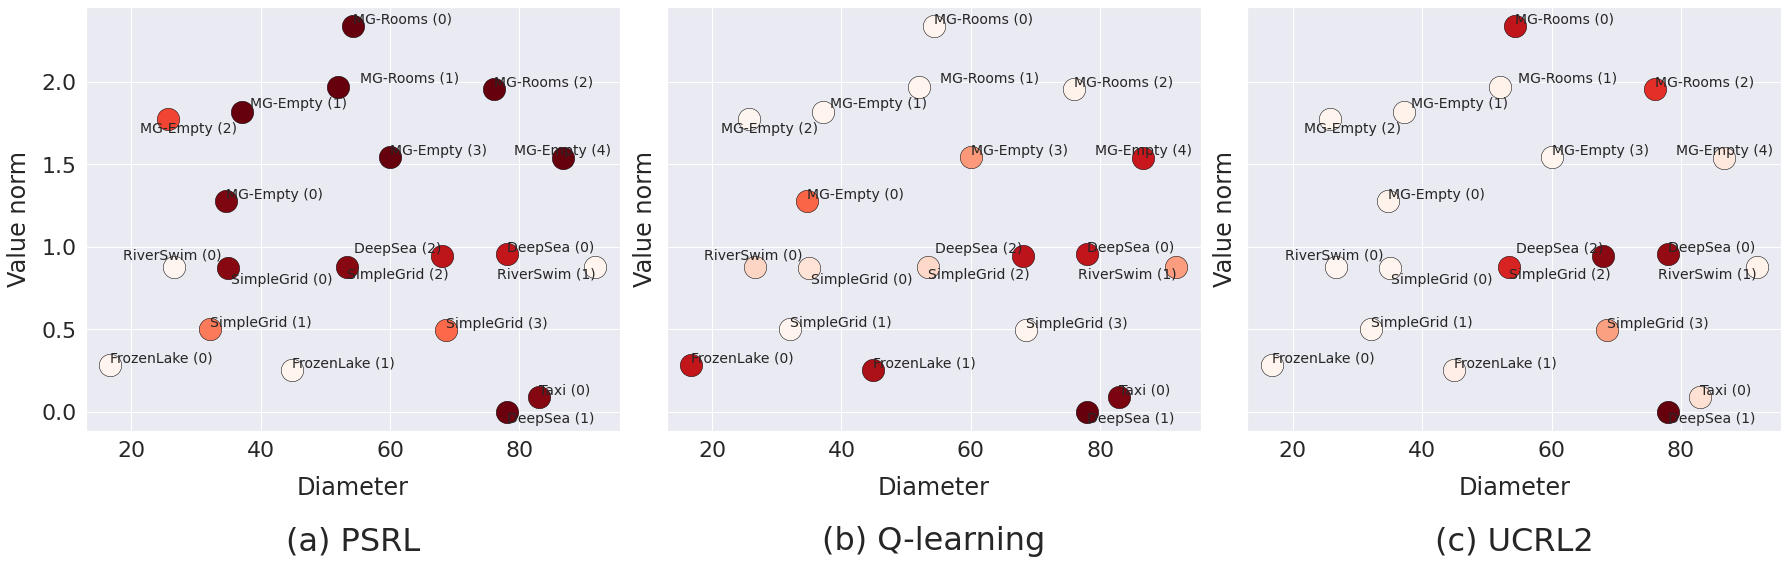

In [6]:
fig = plot_indicator_in_hardness_space(benchmark_log_folder, fontsize=24, savefig_folder = None)

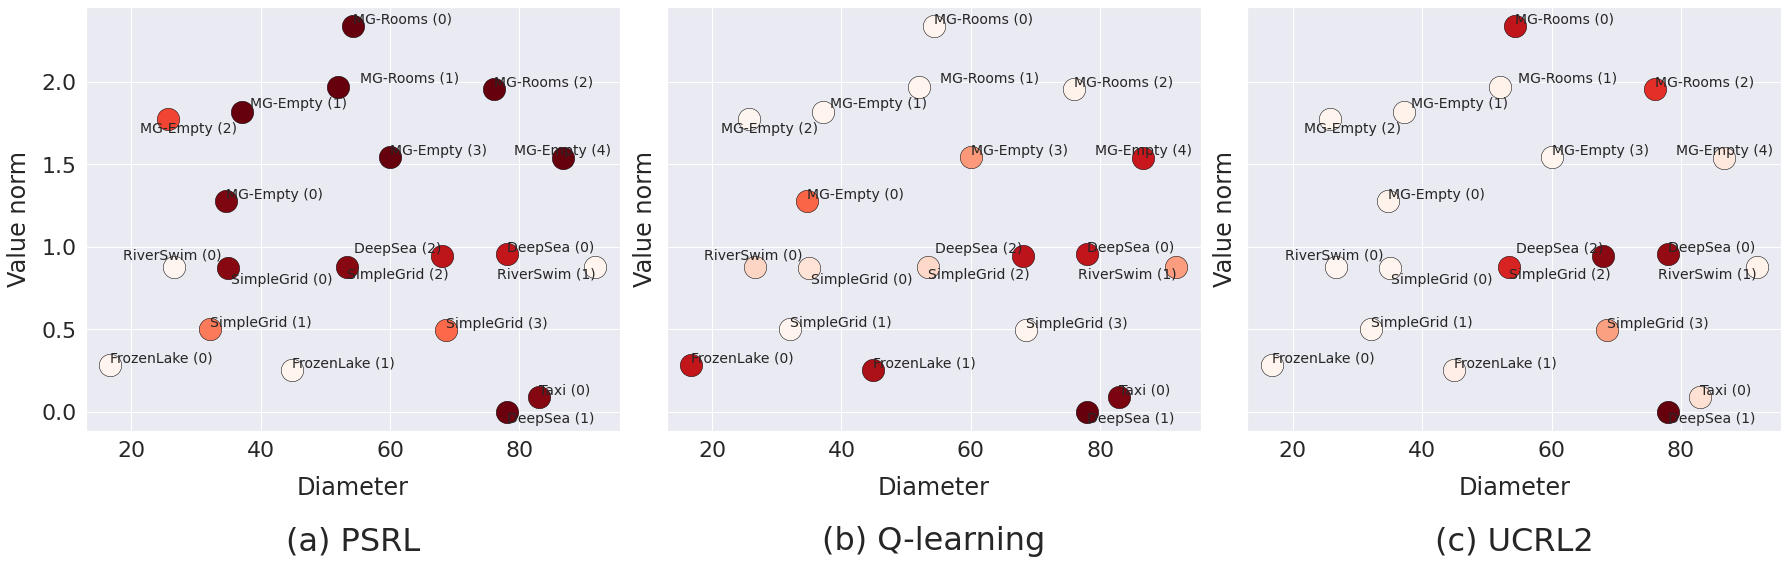

In [7]:
glue("hardness_space", fig, display=False)

````{div} full-width
```{glue:} hardness_space
```
````


#### Online agents' performances
The [`agent_performances_per_mdp_plot`](../pdoc_files/colosseum/analysis/plots.html#agent_performances_per_mdp_plot) function
produces a plot that shows the values for a given indicator during the agent/MDP interactions.
This plot enables easily comparing agents' performances in the benchmark MDPs and provides an intuitive overview of the critical moments of the agent/MDP interaction, e.g., when the agent runs out of time or reaches the optimal policy.

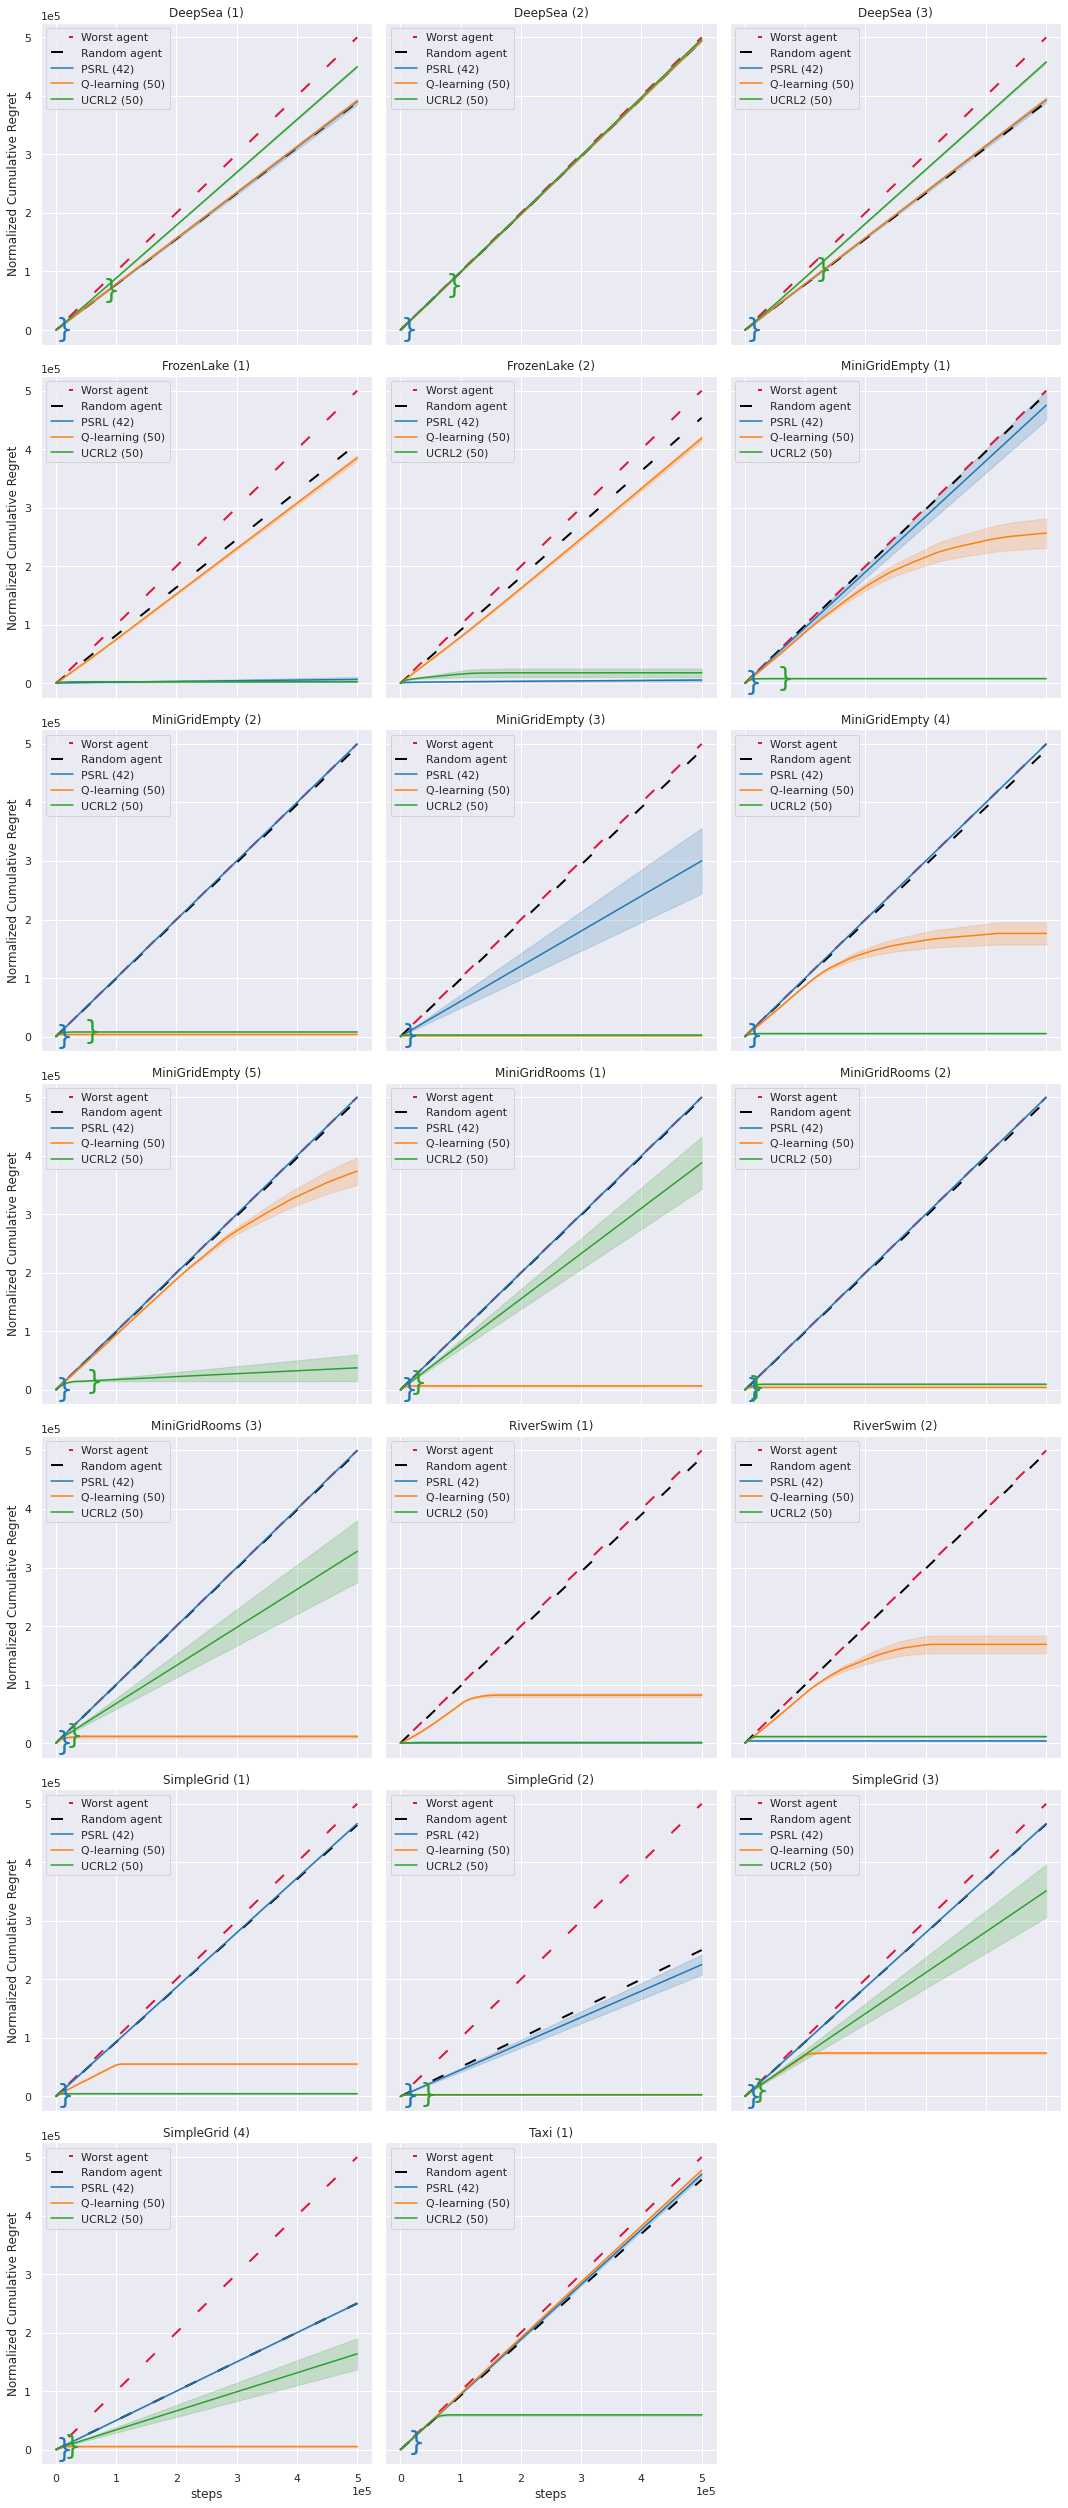

In [8]:
fig = agent_performances_per_mdp_plot(
    benchmark_log_folder,
    "normalized_cumulative_regret",
    figsize_scale=5,
    standard_error=True,
    n_rows=7,
    savefig_folder = None
)

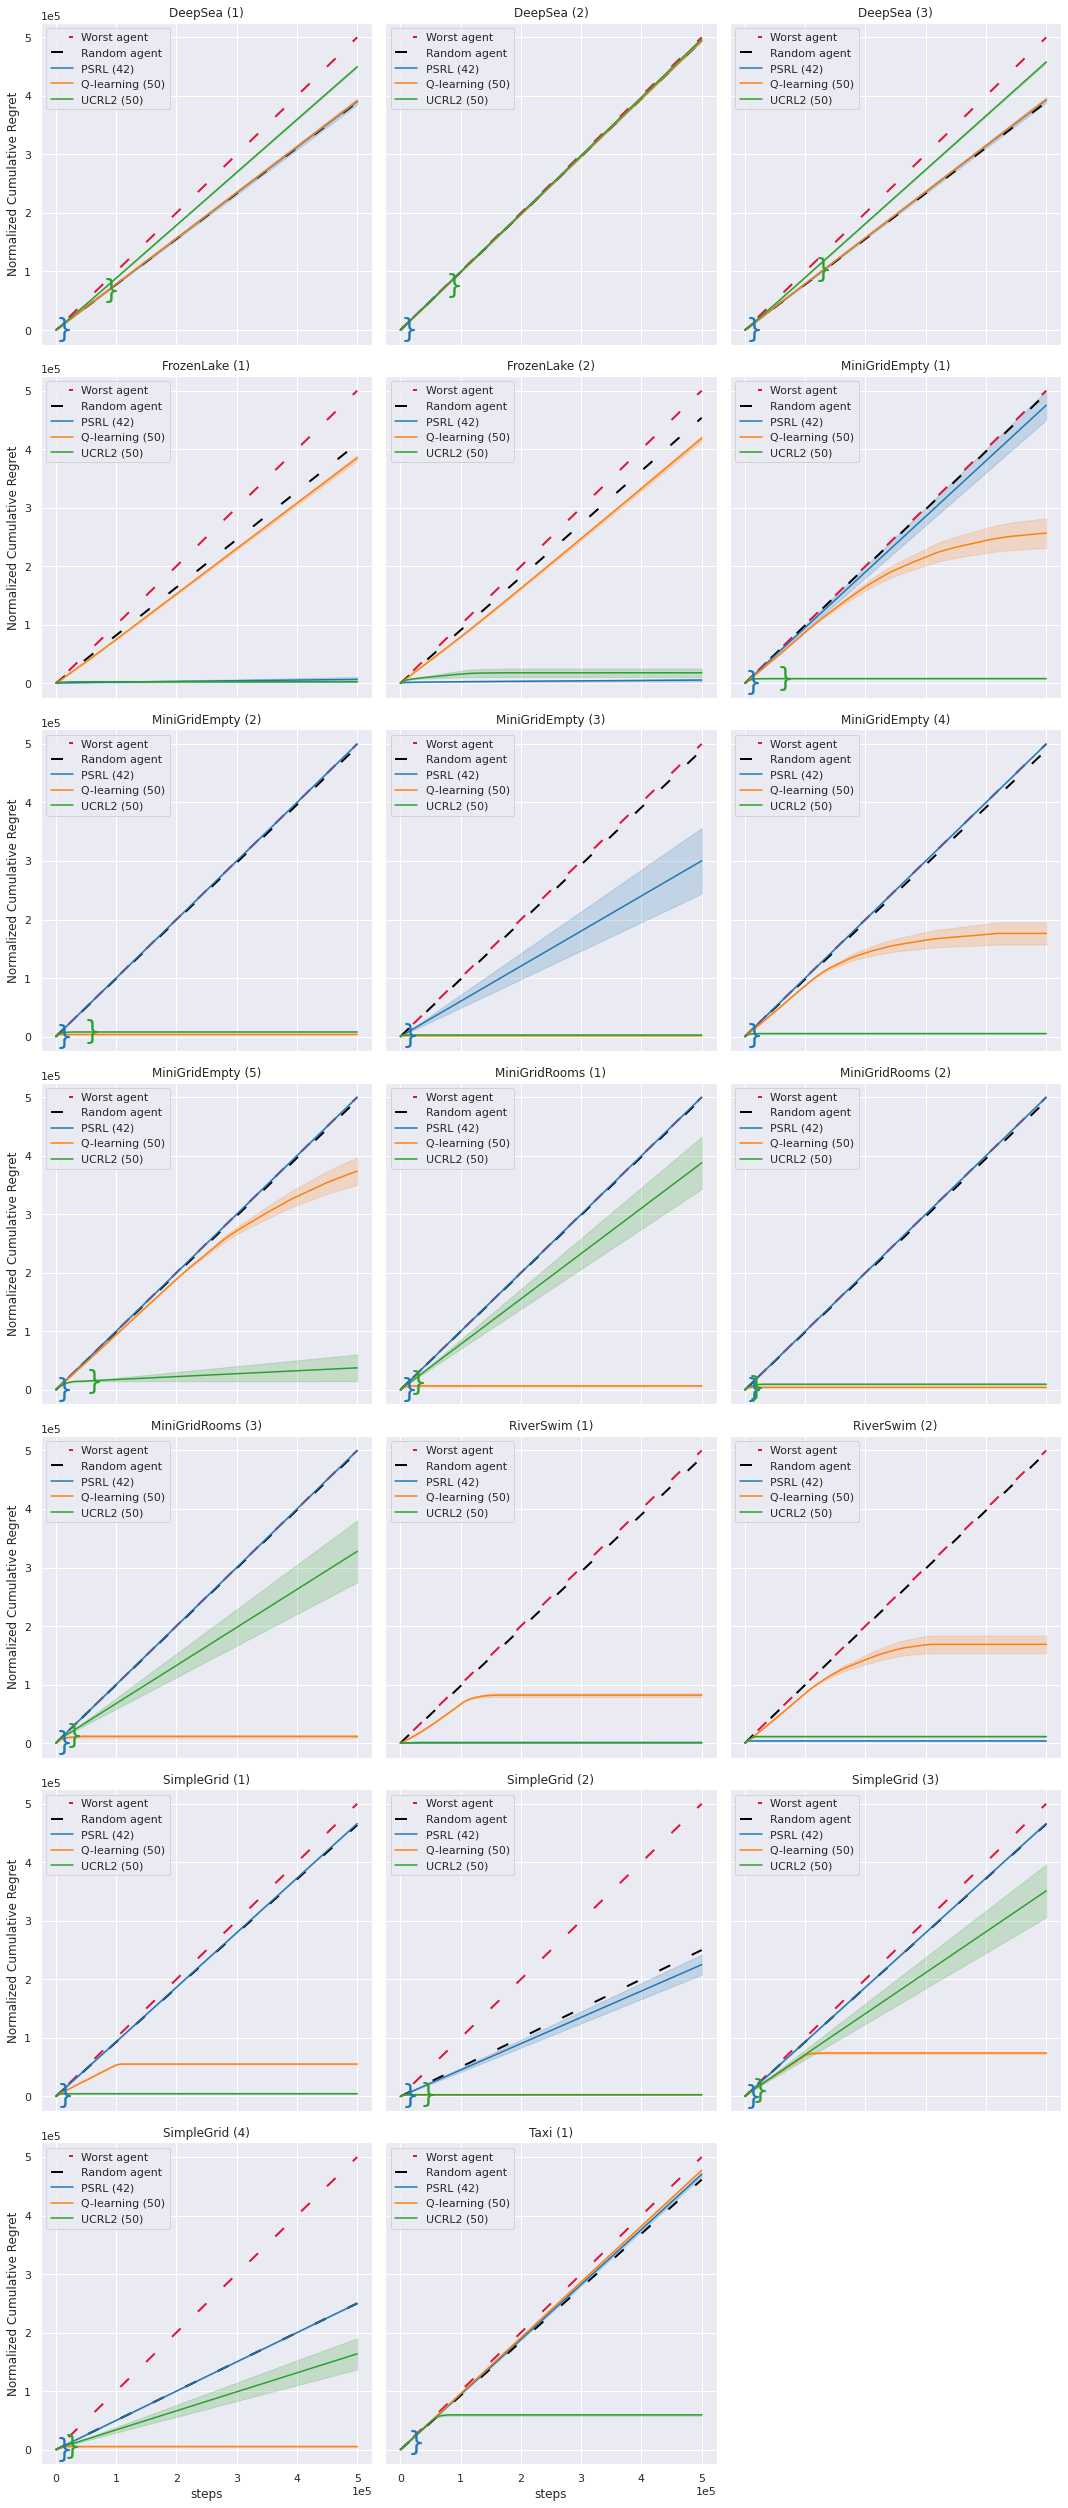

In [9]:
glue("performances_per_mdp_plot", fig, display=False)

`````{div} full-width
```{glue:} performances_per_mdp_plot
```
`````

In [10]:
from colosseum import config
shutil.rmtree("tmp", ignore_errors=True)
shutil.rmtree(config.get_hardness_measures_cache_folder(), ignore_errors=True)